Loading required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

/tmp/ipykernel_14077/380782245.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load Data From CSV File  

In [2]:
df = pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Visualizing the data

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Non

array([[<Axes: title={'center': 'petal_width'}>]], dtype=object)

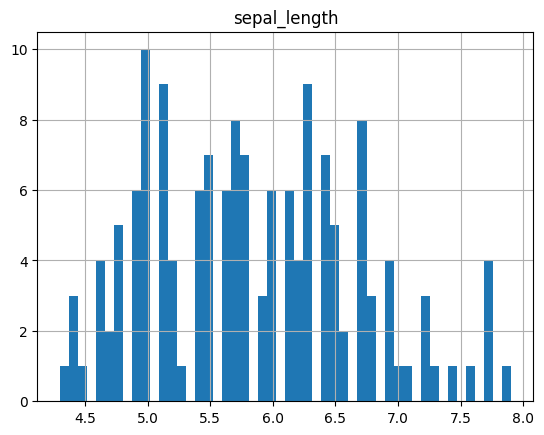

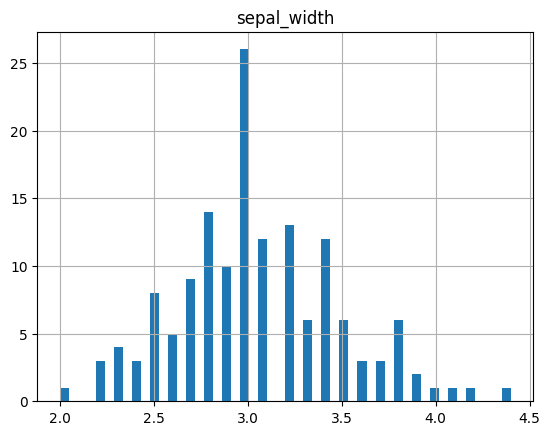

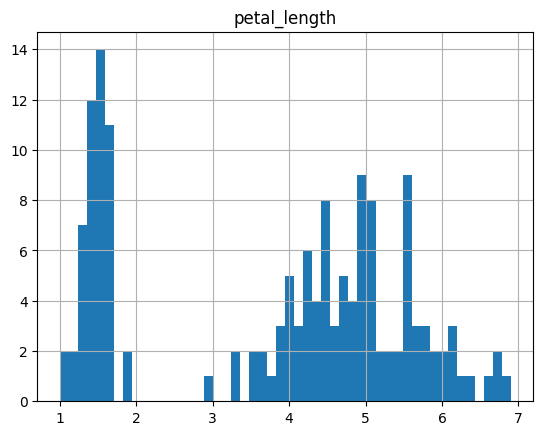

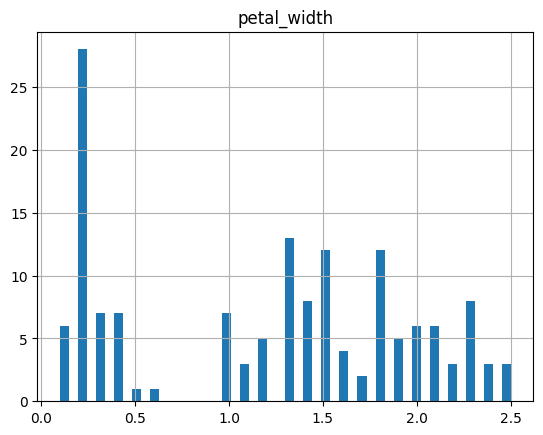

In [4]:
df_description = df.describe()
print(df_description)


# Print DataFrame information
print(df.info())

df.hist(column='sepal_length', bins=50)
df.hist(column='sepal_width', bins=50)
df.hist(column='petal_length', bins=50)
df.hist(column='petal_width', bins=50)

### Feature set


In [5]:
X = df.drop('species', axis=1) .values  #.astype(float)
X[0:5]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y = df['species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### Visualising the Data

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

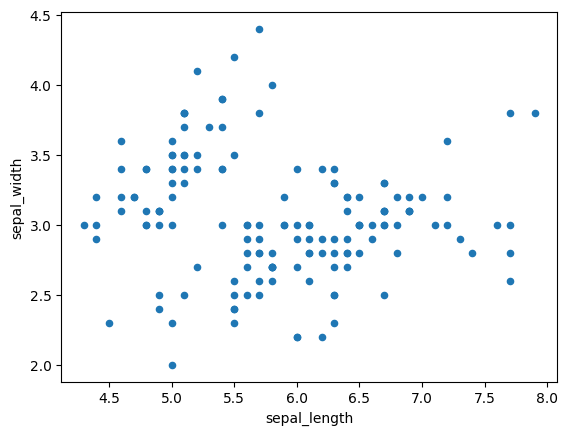

In [7]:
df.plot(x="sepal_length", y="sepal_width", kind="scatter")

<Axes: xlabel='petal_length', ylabel='petal_width'>

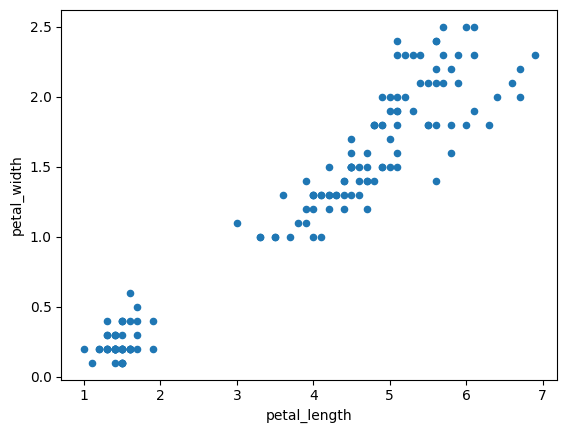

In [8]:
df.plot(x="petal_length", y="petal_width", kind="scatter")

### Preprocessing Data


Since the target column is not in numerical form we are converting the data

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Train Test Split  

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3>Naïve Bayes</h3>


#### Import library 


In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
#Train Model and Predict  
nb = GaussianNB().fit(X_train,y_train)
nb

GaussianNB()

In [13]:
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test_norm[0:5]

array([[ 0.72873458, -0.5823671 ,  1.13619554,  1.34326995],
       [-0.0655609 ,  1.56570827, -0.90476983, -0.91409242],
       [ 1.8634424 , -0.5823671 ,  1.39785776,  1.09245191],
       [ 2.09038396, -0.15275203,  1.65951999,  1.34326995],
       [ 1.74997161, -0.36755956,  1.50252265,  0.96704289]])

### Predicting
We can use the model to make predictions on the test set:


In [14]:
yhat = nb.predict(X_test)
yhat[0:5]

array([2, 0, 2, 2, 2])

### Evaluation

In [15]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, nb.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9523809523809523
Test set Accuracy:  0.9777777777777777


Confusion Matrix

In [16]:
print("Training Confusion Matrix:\n", metrics.confusion_matrix(y_train, nb.predict(X_train)))
print("Testing Confusion Matrix:\n", metrics.confusion_matrix(y_test, yhat))

Training Confusion Matrix:
 [[29  0  0]
 [ 0 37  3]
 [ 0  2 34]]
Testing Confusion Matrix:
 [[21  0  0]
 [ 0 10  0]
 [ 0  1 13]]


Reversing Label Encoding

In [17]:
y_test_cat = le.inverse_transform(y_test)
yhat_cat = le.inverse_transform(yhat)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test_cat, yhat_cat))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        21
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



Model has predicted 100% accurately for Iris-setosa, 95% accurately for Iris-versicolor and 96% accurately for Iris-virginica.
Overall, the model has an accuracy of 97.78%